In [1]:
#  pip install openpyxl

In [1]:
import matplotlib
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os


import seaborn as sns
from matplotlib import rcParams

#绘图前的基本设置

myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\Times New Roman.tiff') # 设置字体

# 设置matplotlib正常显示中文和负号

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
# matplotlib.rcParams['font.sans-serif']=['NSimSun']   # 用黑体显示中文
# matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['font.size'] = 18
# matplotlib.rcParams['font.family'] = 'sans-serif'  
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'  # NSimSun 新宋体字体   宋体：SimSuncss

%matplotlib inline  
#内嵌绘图，并且可以省略掉plt.show()这一步
os.chdir(r'E:\BaiduSyncdisk\EHF-文献-数据-文章\EHF\04Mean_difference')


In [46]:
import re
import os
import glob
import pandas as pd


import pandas as pd

# 存储所有年份的DataFrame列表
all_data_frames = []

# 循环遍历每一年，读取CSV文件，添加年份列，并将DataFrame存储在列表中
for year in range(2001, 2021):
    file_name = f"{year}.csv"
    df = pd.read_csv(file_name)

    # 添加年份列，将该年的值设置为所有行
    df['year'] = year

    # 将此DataFrame添加到列表中
    all_data_frames.append(df)

# 使用pd.concat合并所有DataFrame
merged_df = pd.concat(all_data_frames)

# 如果需要，可以将合并的DataFrame保存为新的CSV文件
merged_df.to_csv("merged-2001-2020.csv", index=False)


In [47]:
df = pd.read_csv('merged-2001-2020.csv', thousands=',',engine='python',encoding= "UTF-8")
# df['year'] = pd.to_datetime(df['year'])
print(df.shape)
print(df.columns)

(3060, 4)
Index(['Unnamed: 0', '[x][0]', '[x][1]', 'year'], dtype='object')


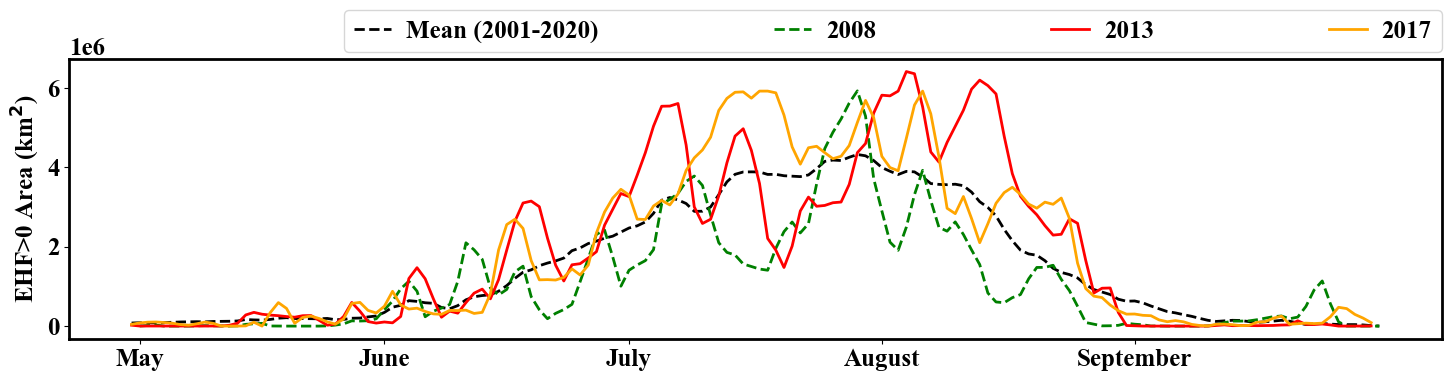

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取合并后的数据
merged_df = pd.read_csv("merged.csv")

# 计算每个DOY的EHF>0 Area(km2)均值
mean_curve = merged_df.groupby('DOY')['EHF>0 Area(km2)'].mean().reset_index()


fig, ax1 = plt.subplots(figsize=(15, 4))

plt.subplots_adjust(left=0.06, right=0.975, top=0.87, bottom=0.17)

# # 绘制均值曲线
# plt.plot(mean_curve['DOY'], mean_curve['EHF>0 Area(km2)'], label='Mean')

# # 绘制2008年、2013年和2017年的曲线
# plt.plot(curve_2008['DOY'], curve_2008['EHF>0 Area(km2)'], label='2008')
# plt.plot(curve_2013['DOY'], curve_2013['EHF>0 Area(km2)'], label='2013')
# plt.plot(curve_2017['DOY'], curve_2017['EHF>0 Area(km2)'], label='2017')

# 计算2000-2019年的EHF>0 Area(km2)的均值
mean_area = merged_df.groupby('DOY')['EHF>0 Area(km2)'].mean()
# 绘制均值曲线，黑色虚线
plt.plot(mean_area, 'k--', label='Mean (2001-2020)', linewidth=2)

# 绘制2008年的曲线，绿色虚线
area_2008 = merged_df[merged_df['Year'] == 2008].set_index('DOY')['EHF>0 Area(km2)']
plt.plot(area_2008, 'g--', label='2008', linewidth=2)

# 绘制2013年的曲线，红色实线
area_2013 = merged_df[merged_df['Year'] == 2013].set_index('DOY')['EHF>0 Area(km2)']
plt.plot(area_2013, 'r-', label='2013', linewidth=2)

# 绘制2017年的曲线，橙色实线
area_2017 = merged_df[merged_df['Year'] == 2017].set_index('DOY')['EHF>0 Area(km2)']
plt.plot(area_2017, 'orange', label='2017', linewidth=2)


# 显示图例
plt.legend()

# 加粗图形边框
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

# 添加图例、标题和坐标轴标签
plt.legend()
leg=plt.legend(fontsize=18,bbox_to_anchor=(0.2, 1.023, 0.8,1.1), loc='lower left',handletextpad=0.6,
                      ncol=10, mode="expand", borderaxespad=0.,handlelength=1.5)

months = {122: 'May', 152: 'June', 182: 'July', 213: 'August', 244: 'September'}
plt.xticks(list(months.keys()), list(months.values()))

# plt.title('EHF>0 Area(km2) Curves')
# plt.xlabel('DOY')
# plt.ylabel('EHF>0 Area(km2)',fontsize=18)
# plt.ylabel('EHF>0 Area (km$^2$) ($10^6$)', family='Times New Roman', fontsize=12)

plt.ylabel('EHF>0 Area (km$^2$)', family='Times New Roman',fontsize=18)
plt.savefig('heatwave2008-2013-2017-mean.jpg', dpi=300, facecolor="none", transparent=True)
# 显示图形




In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设您的数据如下所示
data = pd.read_csv('china_effects_decomposition.csv',engine='python',encoding= "UTF-8")
df = pd.DataFrame(data)

# 颜色
my_color = ['red', 'magenta', 'green', 'grey']

# 创建bar plot
fig, ax1 = plt.subplots(figsize=(16, 5))

plt.subplots_adjust(left=0.06, right=0.975, top=0.9, bottom=0.16)
ax1 = df.plot(x="year", y=["Climate effect", "Population effect", "Combined effect","Total exposure"], kind="bar", ax=ax1, color=my_color)
# fig.legend(["Climate effect", "Population effect", "Combined effect","Total Exposure"])
# 添加y轴标签
ax1.set_ylabel('Eldly population exposure ',fontsize=18)

# text = "(person-days)"
# ax1.text(x=2001.5,y=3.95e+07 , s= text, size=18, color = 'black')

ax1.set_xlabel(' ')
# leg=plt.legend(fontsize=18,bbox_to_anchor=(0.05, 1.01, 0.95,1.12), loc='lower left',handletextpad=0.6,
#                       ncol=10, mode="expand", borderaxespad=0.,handlelength=1.5)


leg=plt.legend(fontsize=18,bbox_to_anchor=(0.2, 1.01, 0.8,1.12), loc='lower left',handletextpad=0.6,
                      ncol=10, mode="expand", borderaxespad=0.,handlelength=1.5)
# # 创建一个用于line plot的辅助y轴
# ax2 = ax1.twinx()

# # 使用辅助y轴绘制line plot
# ax2.plot(df["year"], df["Aging_Population_Exposure"], color='blue', marker='o', linestyle='-')

# # 添加line plot的y轴标签
# ax2.set_ylabel('Total elderly population exposure')

# 添加line plot到图例
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# 保存图片
plt.savefig('Decompose_the_effect_and_all_exposure1.jpg', dpi=300, facecolor="none", transparent=True)


FileNotFoundError: [Errno 2] No such file or directory: 'china_effects_decomposition.csv'

In [109]:
yr_range = max(data["year"]) - min(data["year"]) + 1
print(yr_range)


20


In [110]:

import statsmodels.api as sm
import seaborn as sns
from matplotlib import rcParams


In [163]:
#### Regressions, no intercept addition is needed because we're using SK LEARN HERE 

def lm_func(df, col):
    
    "simple linear model of a time series data, returns coef"
    
    # Get Data
    X_year = np.array(df["year"]).reshape((-1, 1))
    Y_stats = np.array(df[col]).reshape((-1, 1))

    # Add Intercept
    X_year_2 = sm.add_constant(X_year)

    # Regress
    model = sm.OLS(Y_stats, X_year_2).fit() 
        
    coef = int(model.params[1])
    #coef = int(coef)
            
    # R2 and P
    r2 = model.rsquared_adj
    p = model.pvalues[0]
    
    return coef, round(r2, 2), round(p, 4)


1119545 0.6 0.0


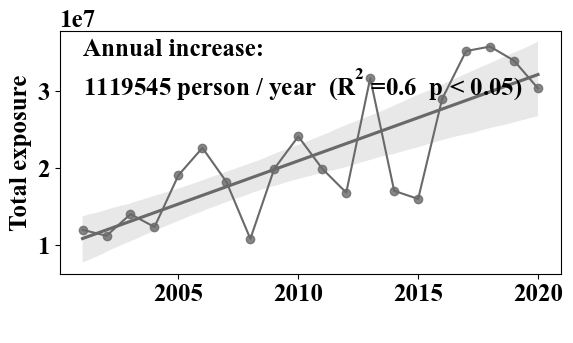

In [229]:
fig, ax = plt.subplots(figsize=(6,3))
matplotlib.rcParams['font.size'] = 18.0
# rcParams['axes.xmargin'] = 0.01
# rcParams['axes.ymargin'] = 0.01
# plt.subplots_adjust(left=0.001, right=0.002, top=0.002, bottom=0.001,wspace=0.001)

plt.subplots_adjust(left=0.14, right=0.975, top=0.9, bottom=0.09)

plt.rcParams['font.sans-serif'] = 'Times New Roman'
g = sns.regplot(x="year",y="Total exposure",data=df,color="dimgray") #画回归图看取值范围
g = sns.lineplot(data=df, x="year",y="Total exposure",color="dimgray")
coef, r2, p = lm_func(df, 'Total exposure')
print(coef, r2, p)
# text = 'Annual increase:\n'+str(round(coef, 1))+' days $yr^-1$'
text = 'Annual increase:\n'+str(round(coef, 1))+' person / year '+ ' ($\mathregular{R^2}$ ='+ str(round(r2, 2))+'  p < 0.05) '


plt.text(x=2001,y=2.95e+07 , s= text, size=18, color = 'black')
# plt.text(x=2016,y=1.196310e+07 , s= "(a)", size=30, color = 'black',fontweight='bold')
ax.set_xlabel(' ')
plt.savefig('01Total exposure1.jpg', dpi=300)
plt.show()

In [182]:
# fig, ax = plt.subplots(figsize=(6,6))

# matplotlib.rcParams['font.size'] = 18.0
# # rcParams['axes.xmargin'] = 0.01
# # rcParams['axes.ymargin'] = 0.01
# # plt.subplots_adjust(left=0.001, right=0.002, top=0.002, bottom=0.001,wspace=0.001)

# plt.subplots_adjust(left=0.14, right=0.975, top=0.95, bottom=0.05)

# plt.rcParams['font.sans-serif'] = 'Times New Roman'
# g = sns.regplot(x="year",y="Total exposure",data=df,color="dimgray") #画回归图看取值范围
# g = sns.lineplot(data=df, x="year",y="Total exposure",color="dimgray")
# coef, r2, p = lm_func(df, 'Total exposure')
# print(coef, r2, p)
# # text = 'Annual increase:\n'+str(round(coef, 1))+' days $yr^-1$'
# text = 'Annual increase:\n'+str(round(coef, 1))+' person / year '+ ' ($\mathregular{R^2}$ ='+ str(round(r2, 2))+'  p < 0.05) '


# plt.text(x=2001,y=3.3e+07 , s= text, size=18, color = 'black')
# # plt.text(x=2016,y=1.196310e+07 , s= "(a)", size=30, color = 'black',fontweight='bold')
# ax.set_xlabel(' ')
# plt.savefig('01Total exposure.jpg', dpi=300)
# plt.show()

390124 0.25 0.0141


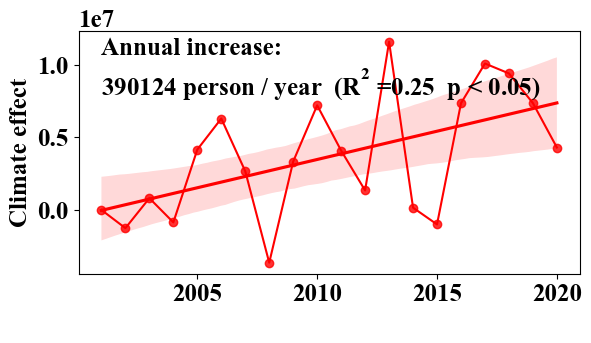

In [181]:
# fig, ax = plt.subplots(figsize=(6,6))
fig, ax = plt.subplots(figsize=(6,3))
matplotlib.rcParams['font.size'] = 18.0
# rcParams['axes.xmargin'] = 0.01
# rcParams['axes.ymargin'] = 0.01
# plt.subplots_adjust(left=0.001, right=0.002, top=0.002, bottom=0.001,wspace=0.001)

# plt.subplots_adjust(left=0.14, right=0.975, top=0.95, bottom=0.05)
plt.subplots_adjust(left=0.14, right=0.975, top=0.9, bottom=0.09)

plt.rcParams['font.sans-serif'] = 'Times New Roman'
g = sns.regplot(x="year",y="Climate effect",data=df,color="r") #画回归图看取值范围
g = sns.lineplot(data=df, x="year",y="Climate effect",color="r")
coef, r2, p = lm_func(df, 'Climate effect')
print(coef, r2, p)
# text = 'Annual increase:\n'+str(round(coef, 1))+' days $yr^-1$'
text = 'Annual increase:\n'+str(round(coef, 1))+' person / year '+ ' ($\mathregular{R^2}$ ='+ str(round(r2, 2))+'  p < 0.05) '


plt.text(x=2001,y=0.8e+07 , s= text, size=18, color = 'black')
# plt.text(x=2016,y=1.196310e+07 , s= "(a)", size=30, color = 'black',fontweight='bold')
ax.set_xlabel(' ')
# plt.savefig('02Climate effect.jpg', dpi=300)
plt.savefig('02Climate effect1.jpg', dpi=300)
plt.show()

In [183]:
# fig, ax = plt.subplots(figsize=(6,6))

# matplotlib.rcParams['font.size'] = 18.0
# # rcParams['axes.xmargin'] = 0.01
# # rcParams['axes.ymargin'] = 0.01
# # plt.subplots_adjust(left=0.001, right=0.002, top=0.002, bottom=0.001,wspace=0.001)

# plt.subplots_adjust(left=0.14, right=0.975, top=0.95, bottom=0.05)

# plt.rcParams['font.sans-serif'] = 'Times New Roman'
# g = sns.regplot(x="year",y="Population effect",data=df,color="magenta") #画回归图看取值范围
# g = sns.lineplot(data=df, x="year",y="Population effect",color="magenta")
# coef, r2, p = lm_func(df, 'Population effect')
# print(coef, r2, p)
# # text = 'Annual increase:\n'+str(round(coef, 1))+' days $yr^-1$'
# text = 'Annual increase:\n'+str(round(coef, 1))+' person / year '+ ' ($\mathregular{R^2}$ ='+ str(round(r2, 2))+'  p < 0.05) '


# plt.text(x=2001,y=1e+07 , s= text, size=18, color = 'black')
# # plt.text(x=2016,y=1.196310e+07 , s= "(a)", size=30, color = 'black',fontweight='bold')
# ax.set_xlabel(' ')
# plt.savefig('03Population effect.jpg', dpi=300)
# plt.show()

479580 0.88 0.0


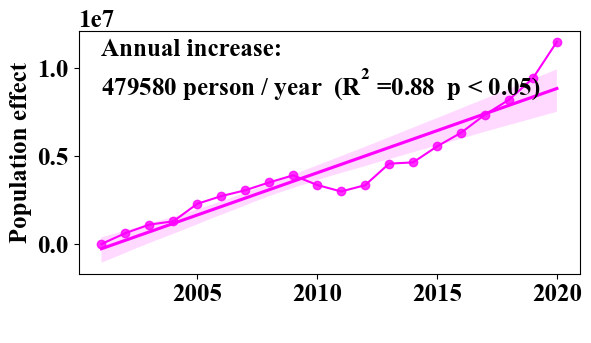

In [186]:

fig, ax = plt.subplots(figsize=(6,3))

matplotlib.rcParams['font.size'] = 18.0
# rcParams['axes.xmargin'] = 0.01
# rcParams['axes.ymargin'] = 0.01
# plt.subplots_adjust(left=0.001, right=0.002, top=0.002, bottom=0.001,wspace=0.001)
plt.subplots_adjust(left=0.14, right=0.975, top=0.9, bottom=0.09)

plt.rcParams['font.sans-serif'] = 'Times New Roman'
g = sns.regplot(x="year",y="Population effect",data=df,color="magenta") #画回归图看取值范围
g = sns.lineplot(data=df, x="year",y="Population effect",color="magenta")
coef, r2, p = lm_func(df, 'Population effect')
print(coef, r2, p)
# text = 'Annual increase:\n'+str(round(coef, 1))+' days $yr^-1$'
text = 'Annual increase:\n'+str(round(coef, 1))+' person / year '+ ' ($\mathregular{R^2}$ ='+ str(round(r2, 2))+'  p < 0.05) '


plt.text(x=2001,y=0.85e+07 , s= text, size=18, color = 'black')
# plt.text(x=2016,y=1.196310e+07 , s= "(a)", size=30, color = 'black',fontweight='bold')
ax.set_xlabel(' ')
plt.savefig('03Population effect1.jpg', dpi=300)
plt.show()

In [187]:
# fig, ax = plt.subplots(figsize=(6,6))
# matplotlib.rcParams['font.size'] = 18.0
# # rcParams['axes.xmargin'] = 0.01
# # rcParams['axes.ymargin'] = 0.01
# # plt.subplots_adjust(left=0.001, right=0.002, top=0.002, bottom=0.001,wspace=0.001)

# plt.subplots_adjust(left=0.14, right=0.975, top=0.95, bottom=0.05)

# plt.rcParams['font.sans-serif'] = 'Times New Roman'
# g = sns.regplot(x="year",y="Combined effect",data=df,color="g") #画回归图看取值范围
# g = sns.lineplot(data=df, x="year",y="Combined effect",color="g")
# coef, r2, p = lm_func(df, 'Combined effect')
# print(coef, r2, p)
# # text = 'Annual increase:\n'+str(round(coef, 1))+' days $yr^-1$'
# text = 'Annual increase:\n'+str(round(coef, 1))+' person / year '+ ' ($\mathregular{R^2}$ ='+ str(round(r2, 2))+'  p < 0.05) '


# plt.text(x=2001,y=5e+06 , s= text, size=18, color = 'black')
# # plt.text(x=2016,y=1.196310e+07 , s= "(a)", size=30, color = 'black',fontweight='bold')
# ax.set_xlabel(' ')
# plt.savefig('04Combined effect.jpg', dpi=300)
# plt.show()

245558 0.44 0.0009


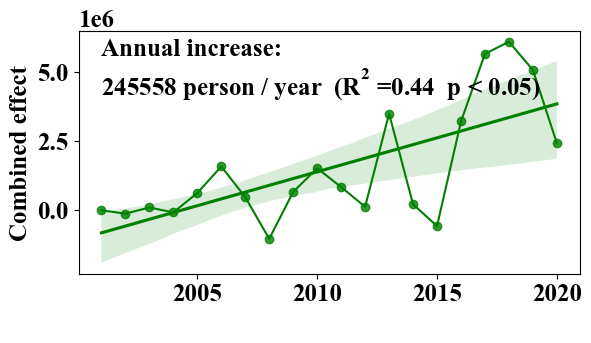

In [193]:
fig, ax = plt.subplots(figsize=(6,3))
matplotlib.rcParams['font.size'] = 18.0
# rcParams['axes.xmargin'] = 0.01
# rcParams['axes.ymargin'] = 0.01
# plt.subplots_adjust(left=0.001, right=0.002, top=0.002, bottom=0.001,wspace=0.001)

plt.subplots_adjust(left=0.14, right=0.975, top=0.9, bottom=0.09)

plt.rcParams['font.sans-serif'] = 'Times New Roman'
g = sns.regplot(x="year",y="Combined effect",data=df,color="g") #画回归图看取值范围
g = sns.lineplot(data=df, x="year",y="Combined effect",color="g")
coef, r2, p = lm_func(df, 'Combined effect')
print(coef, r2, p)
# text = 'Annual increase:\n'+str(round(coef, 1))+' days $yr^-1$'
text = 'Annual increase:\n'+str(round(coef, 1))+' person / year '+ ' ($\mathregular{R^2}$ ='+ str(round(r2, 2))+'  p < 0.05) '


plt.text(x=2001,y=4.2e+06 , s= text, size=18, color = 'black')
# plt.text(x=2016,y=1.196310e+07 , s= "(a)", size=30, color = 'black',fontweight='bold')
ax.set_xlabel(' ')
plt.savefig('04Combined effect1.jpg', dpi=300)
plt.show()

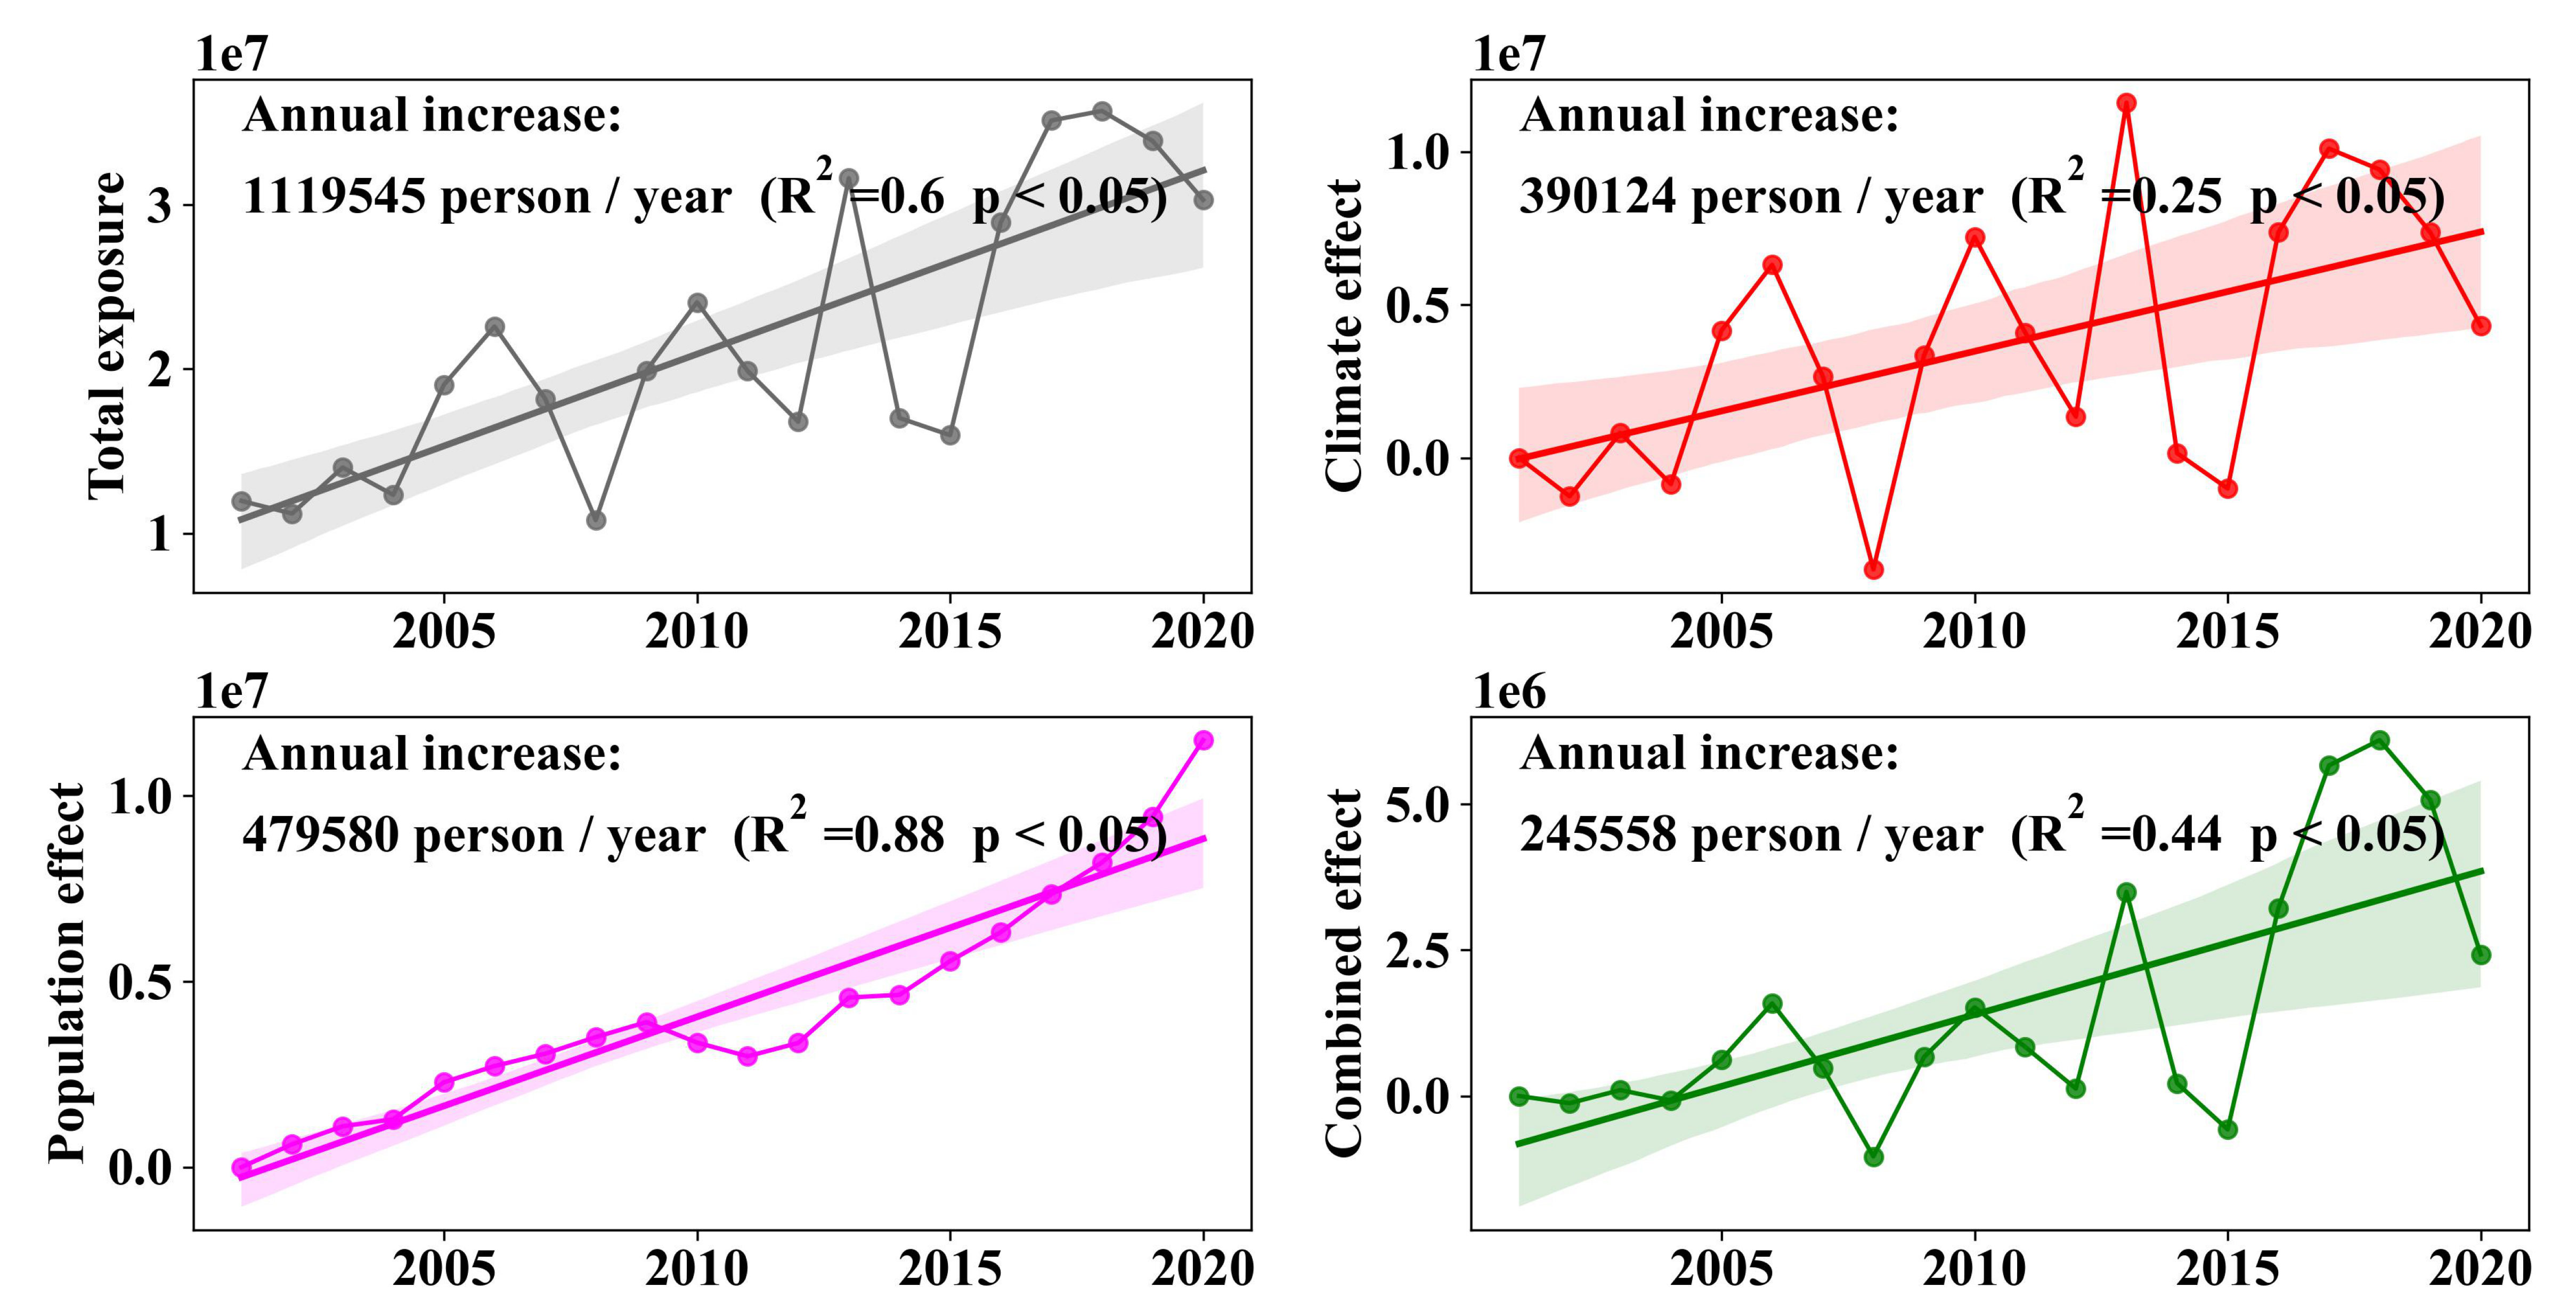

In [203]:
image1 = mpimg.imread('01Total exposure1.jpg')
image2 = mpimg.imread('02Climate effect1.jpg')
image3 = mpimg.imread('03Population effect1.jpg')
image4 = mpimg.imread('04Combined effect1.jpg')

from PIL import Image
plt.figure(figsize=(16,8), dpi=300)
plt.figure(1)

plt.subplot(221)#22 分割成2行2列，选中第一个
plt.axis('off')
plt.imshow(image1)

plt.subplot(222)
plt.axis('off')
plt.imshow(image2)

plt.subplot(223)
plt.axis('off')
plt.imshow(image3)

plt.subplot(224)
plt.axis('off')
plt.imshow(image4)

plt.tight_layout(pad=0.1,h_pad=0.1,w_pad=0.3)
# plt.tight_layout(pad=(2.0, 3.0))
# plt.tight_layout()
plt.savefig("effect-change.jpg")

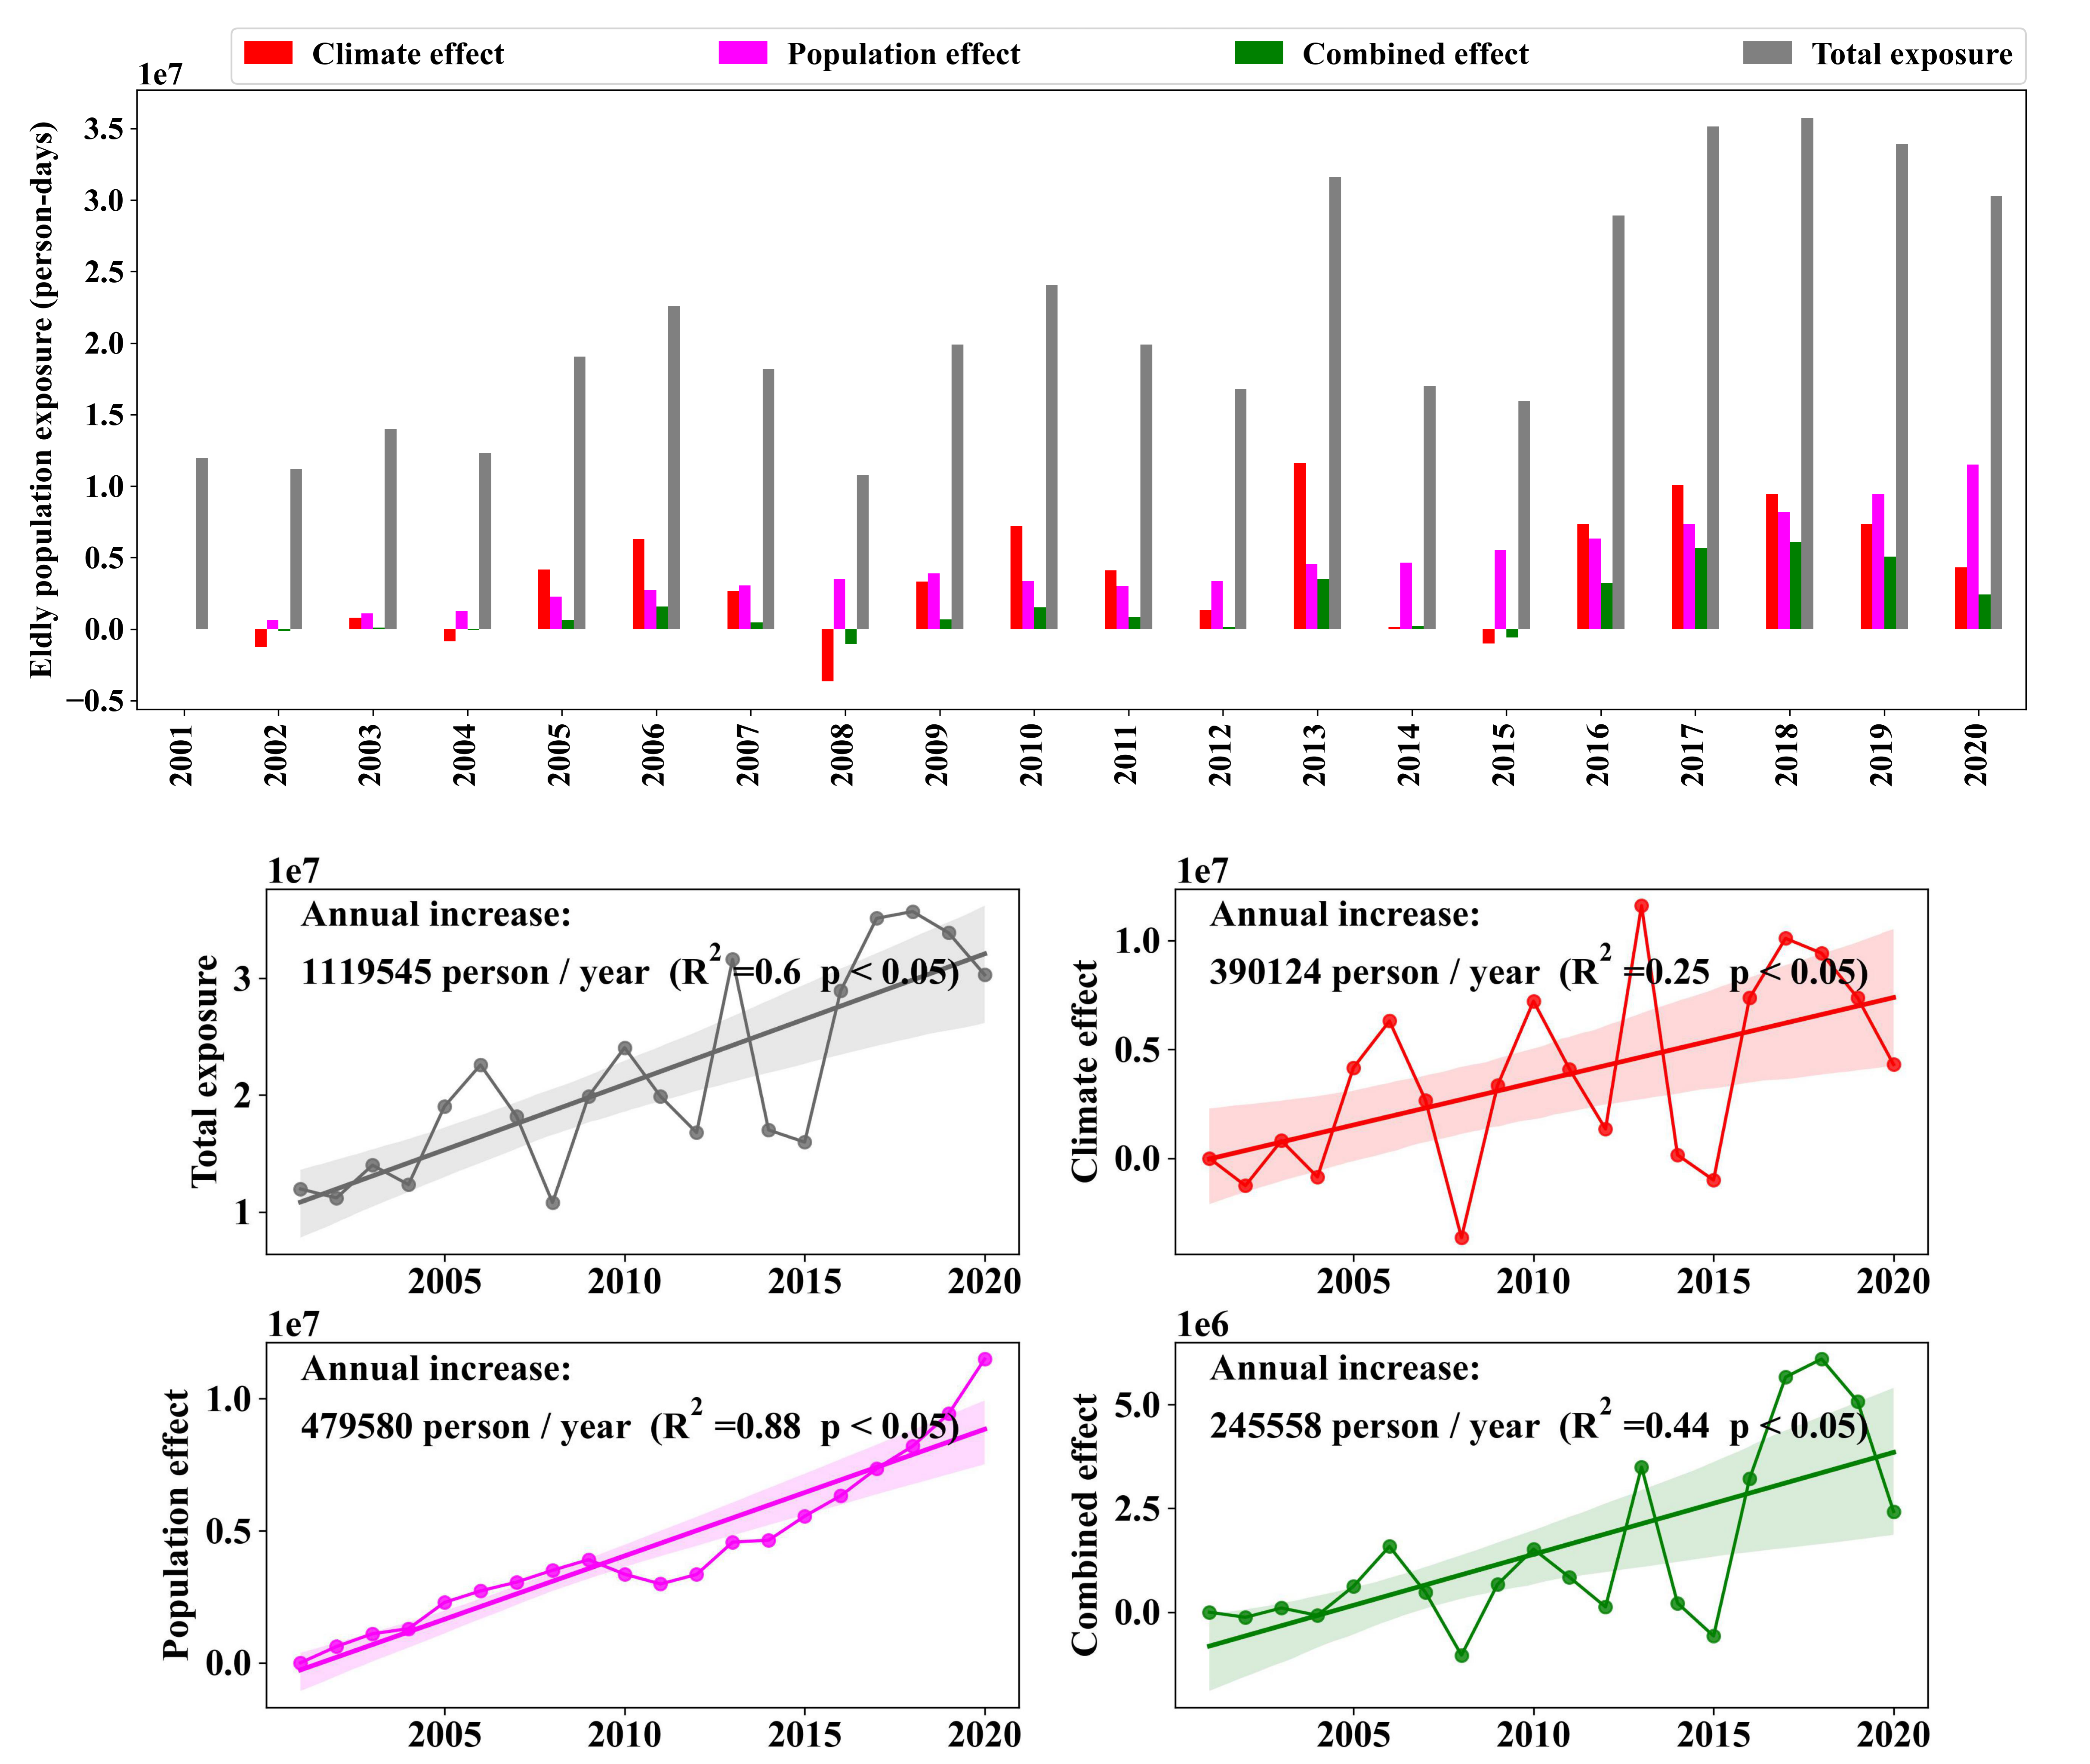

In [225]:
image1 = mpimg.imread('Decompose_the_effect_and_all_exposure.png')
image2 = mpimg.imread('effect-change.jpg')

from PIL import Image
plt.figure(figsize=(16,14), dpi=300)
plt.figure(1)

plt.subplot(211)#22 分割成2行2列，选中第一个
plt.axis('off')
plt.imshow(image1)

plt.subplot(212)
plt.axis('off')
plt.imshow(image2)


plt.tight_layout(pad=0.01,h_pad=0.1,w_pad=0.1)
# plt.tight_layout(pad=(2.0, 3.0))
# plt.tight_layout()
plt.savefig("00combine-effect-change.jpg")